# COTW 8 🎉🎉🎉🎉🎉🎉🎉🎉
![COTW-image](https://community-intel.s3.ap-southeast-1.amazonaws.com/1620592355120.png)

Your friends are doing a group research to find out if there's any relationship between the average number of hours a student studies everyday vs the marks they get. For this, they collected data of 200 random students across the school via survey forms. Very much as expected, many students took it lightly and gave incorrect data. Because of this, they're unable to find an easy way out to solve this issue.
Its your time to help your friends with the knowledge of Python programming. Here's what you need to do:

1. Create a random dataset having details of 200 students with columns for Average percentage and Average hours studied in a day. 
2. Fill random entries in the dataset and put some error values too like Average percentage less than 0 or greater than100, Hours studied less than 0 or greater than 10.

3. Use pre-defined functions from Pandas package to remove entries having erroneous data. 
4. Plot a line graph and a scatter plot to find out the relation between the parameters.
5. Print the conclusion of your observation as the final output of your code.

## Soluiton by [Yash Pawar](https://github.com/yashppawar)
[github repo](https://github.com/yashppawar/COTW-8)

In [1]:
# Standard Imports
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Defining the functions which we will be using

In [2]:
def round_quarter(num):
    '''round_quarter will round the input number to nearest quarter'''
    remainder = num % 1
    num = float(int(num))
    
    if remainder == 0:
        return num
    elif remainder <= 0.25:
        return num + 0.25
    elif remainder <= 0.5:
        return num + 0.5
    elif remainder <= 0.75:
        return num + 0.75
    elif remainder > 0.75:
        return num + 1

In [3]:
def round_half(num):
    '''rounds the input number to nearest half'''
    return int(num) + 0.5 if num % 1 >= 0.5 else int(num)

In [4]:
def are_limits_valid(*limits) -> bool:
    '''checks if the limits are valid or not'''
    for limit in limits:
        if not (limit is int or limit is float):
            return False
    return True

In [5]:
def validate_limits(limits:tuple) -> bool:
    '''Validates the given limits and raises errors if limits are not valid'''
    if len(limits) != 2:
        raise ValueError('The limits are not the reuired shape')
    if are_limits_valid(*limits):
        raise ValueError('Invalid limit types')

In [6]:
def get_unique_random_numbers(n:int, limits:tuple) -> list:
    '''Returns a set of unique random numbers'''
    numbers = set()
    validate_limits(limits)
    if limits[1] - limits[0] < n:
        raise ValueError('invalid set of limits, this will cause this function to run infinately!')

    while len(numbers) < abs(n):
        numbers.add(random.randrange(*limits))

    return list(numbers)

In [7]:
def add_noise(data:np.ndarray, ambiguous_values:list or tuple = (0, -100, -1), noise:float=0.3) -> np.ndarray:
    '''Adds noise/ambigious datapoints to the given data'''
    data = data.copy().astype('float')
    size = len(data)
    noise = int(size * noise)
    indices_to_add_noise = get_unique_random_numbers(noise, (0, size))

    iter_no = 0
    for index in indices_to_add_noise:
        iter_no+=1
        # TODO: make this function compatible with the other data types
        if iter_no % 4 == 0:  # 20% of the noise is NaN values
            data[index] = (np.nan)
            continue

        data[index] = random.randrange(*ambiguous_values)
        
    return data

## Make the dataset


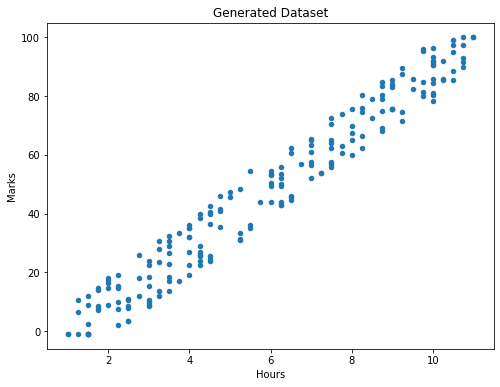

In [9]:
np.random.seed(42)  # to make the dataset reproducabel

num_students = 200  # number of datapoints

array = np.random.rand(num_students)  # refrence array

hours = (array * 100).astype('int') / 10 + 1
hours = np.array(list(map(round_quarter, hours)))  # round the random numbers to quarter

marks = array * 100 + np.random.randint(-10, 10, num_students)
# clean the randomly made incorrect values
marks[marks > 100] -= marks[marks > 100] - 100  
marks[marks < 0] -= marks[marks < 0] + 1 
marks = np.array(list(map(round_half, marks)))  # round the random numbers to half

data = pd.DataFrame({"hours": hours, "marks": marks})

data.plot.scatter('hours', 'marks', figsize=(8, 6))
plt.title('Generated Dataset')
plt.xlabel('Hours')
plt.ylabel('Marks');

### Save the dataset

In [10]:
data.to_csv('data.csv', index=False)

## Load the dataset 

In [16]:
# load the dataset
data = pd.read_csv('./data.csv')
data.head()

,hours,marks
0,4.75,46.0
1,10.50,95.0
2,8.50,79.0
3,7.00,56.5
4,2.50,8.5


## Add the noise to the data

In [17]:
data['hours'] = add_noise(data['hours'], ambiguous_values=(-1, -5, -1), noise=0.1) # -ve noise in hours
data['hours'] = add_noise(data['hours'], ambiguous_values=(12, 24, 1), noise=0.1)  # +ve noise in hours
data['marks'] = add_noise(data['marks'], ambiguous_values=(-1, -50, -1), noise=0.1) # -ve noise in marks
data['marks'] = add_noise(data['marks'], ambiguous_values=(100, 150, 1), noise=0.1) # +ve noise in marks

## checking the noise

In [18]:
data.isna().sum()

hours    9
marks    9
dtype: int64

In [19]:
(data['hours'] < 0).sum(), (data['marks'] < 0).sum()  # invalid data points which are negative

(11, 22)

In [20]:
(data['hours'] > 10).sum(), (data['marks'] > 100).sum()  # invalid data points which are positive

(27, 14)

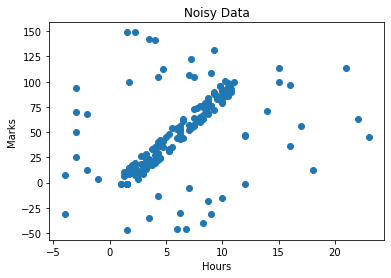

In [21]:
# plot the noisy data
plt.scatter(data['hours'], data['marks'])
plt.title('Noisy Data')
plt.xlabel('Hours')
plt.ylabel('Marks');

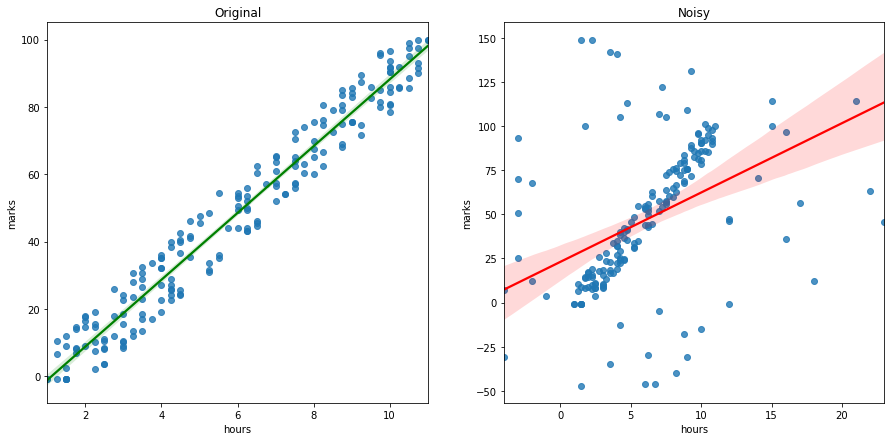

In [26]:
original = pd.read_csv('./data.csv')  # load the original dataset for plotting in comparison

# plot using a regression line
fig,(ax1, ax2) = plt.subplots(figsize=(15, 7), ncols=2)

# ax1 = sns.lmplot(x='hours', y='marks', data=pd.read_csv('./data.csv'), line_kws={'color': 'green'})
sns.regplot(x='hours', y='marks', data=original, line_kws={'color': 'green'}, ax=ax1)
ax1.set(title='Original')

# ax2 = sns.lmplot(x='hours', y='marks', data=data, line_kws={'color': 'red'})
sns.regplot(x='hours', y='marks', data=data, line_kws={'color': 'red'}, ax=ax2)
ax2.set(title='Noisy');

---
We see that after adding the noise the regression line shifts by a lot, which is not good, so we need to perform Data cleaning to make it better.

---
## explotary data anlyisis

In [23]:
data.describe()

,hours,marks
count,191.000000,191.000000
mean,6.218586,46.445026
std,4.703407,40.855984
min,-4.000000,-47.000000
25%,3.000000,15.500000
50%,6.000000,44.000000
75%,9.000000,77.250000
max,23.000000,149.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   191 non-null    float64
 1   marks   191 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


## Dealing with the ambigious values
### **First approach:** removing the ambigious values
1. Remove all the rows containing nan values
2. Remove all the rows which contain +ve or -ve ambigious values

In [27]:
df2 = data.copy() # make copy of data, so we don't loose the original data

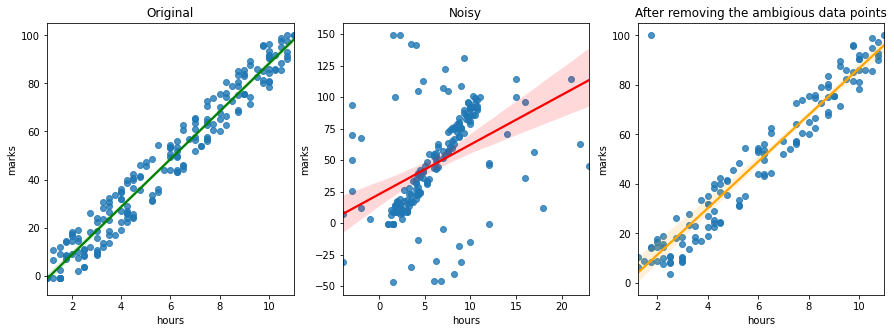

In [28]:
df2.dropna(inplace=True) # remove null values
df2 = df2[~((df2.hours < 0 )|(df2.hours > 11)|(df2.marks < 0)|(df2.marks > 100))]

# plot 
fig,(ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.regplot(x='hours', y='marks', data=original, line_kws={'color': 'green'}, ax=ax1)
ax1.set(title='Original')

sns.regplot(x='hours', y='marks', data=data, line_kws={'color':'red'}, ax=ax2)
ax2.set(title='Noisy')

sns.regplot(x='hours', y='marks', data=df2, line_kws={'color': 'orange'}, ax=ax3)
ax3.set(title='After removing the ambigious data points');

### The line is similar to that of the original data, but we are loosing a lot of data points by removing the data
## **Second approach**: replace the ambigious values with arithematic mean or medain or percentile

In [29]:
df3 = data.copy()  # make a copy of data

In [30]:
# cleanign the null values
df3.hours.fillna(df3.hours.median(), inplace=True)
df3.marks.fillna(df3.marks.median(), inplace=True)

In [31]:
# fill the outliers of marks column
df3.marks[df3.marks < 0] = np.percentile(df3.marks, 50)  # value from hit and trial
df3.marks[df3.marks > 100] = 48.5 # mean value, rounded up

In [32]:
# fill the outliers of hours column
df3.hours[df3.hours < 0] = 1  # hit and trial
df3.hours[df3.hours > 11] = 6.0  # rounded mean

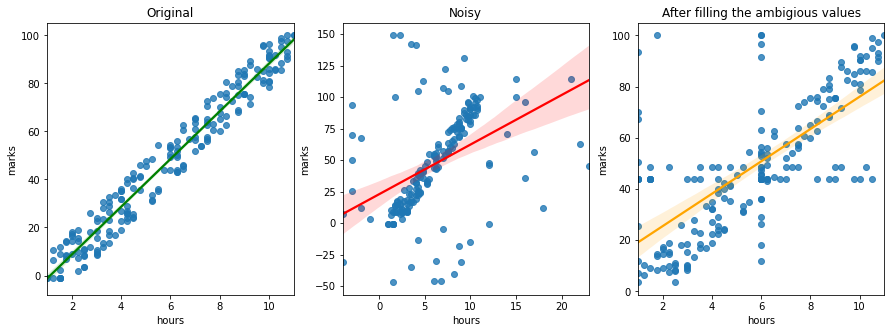

In [33]:
# plot 
fig,(ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.regplot(x='hours', y='marks', data=original, line_kws={'color': 'green'}, ax=ax1)
ax1.set(title='Original')

sns.regplot(x='hours', y='marks', data=data, line_kws={'color':'red'}, ax=ax2)
ax2.set(title='Noisy')

sns.regplot(x='hours', y='marks', data=df3, line_kws={'color': 'orange'}, ax=ax3)
ax3.set(title='After filling the ambigious values');

### Filling the values with mean median and percentile is not very accurate
## **Third attempt**: Filling the ambigious values using a custom algorithm, which groups the data and finds a good value to fill

In [36]:
df4 = data.copy()

In [37]:
# defining a custom function which will help us to find out the values which will help replace ambigious values 
def group_by(value, df, col='hours', n=3):
    '''Retruns a grouped dataframe according to the given values'''
    if np.isnan(value):  # if value is NaN, return values which are NAN, even if there are less instances of NaN containing rows
        temp_data = df[df[col].isna()]
        return temp_data
    
    temp_data = df[df[col] == value]
    if len(temp_data) >= n:
        return temp_data

    # if the data length is less than minimum, try to get nearest data
    length = 1
    min_v = int(value)
    ma
    x_v = min_v + 1
    while length < n:
        temp_data = df[(min_v <= df[col]) & (max_v >= df[col])]
        if len(temp_data) >= n:
            return temp_data
        else:
            min_v -= 1
            max_v += 1

In [38]:
# fill the NaN values using the created algorithm
values = df4[df4['hours'].isna()].apply(lambda x: round_quarter(group_by(x.marks, df4, 'marks', 3)['hours'].mean()), axis=1)
df4['hours'].fillna(values, inplace=True)  # fill hours column

values = df4[df4['marks'].isna()].apply(lambda x: round_quarter(group_by(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1)
df4['marks'].fillna(values, inplace=True)  # fill marks column

In [39]:
# clean the ambigious values in marks col
values = df4[df4['marks'] < 0].apply(lambda x: round_quarter(group_by(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1)
df4.loc[df4['marks'] < 0, 'marks'] = values  # fill the generated values using conditional selection

values = df4[df4['marks'] > 100].apply(lambda x: round_quarter(group_by(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1)
df4.loc[df4['marks'] > 100, 'marks'] = values

In [40]:
# fill the ambigious values in the hours col
values = df4[df4['hours'] > 11].apply(lambda x: round_quarter(group_by(x.marks, df4, 'marks', 9)['hours'].mean()), axis=1)
df4.loc[df4['hours'] > 11, 'hours'] = values

values = df4[df4['hours'] < 1].apply(lambda x: round_quarter(group_by(x.marks, df4, 'marks', 3)['hours'].mean()), axis=1)
df4.loc[df4['hours'] < 1, 'hours'] = values

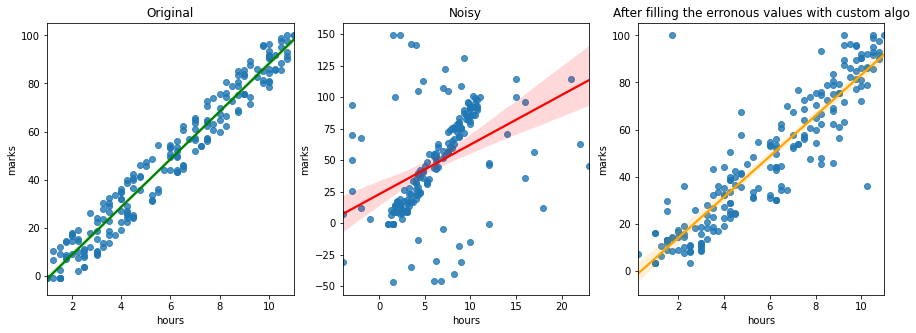

In [41]:
# plot 
fig,(ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.regplot(x='hours', y='marks', data=original, line_kws={'color': 'green'}, ax=ax1)
ax1.set(title='Original')

sns.regplot(x='hours', y='marks', data=data, line_kws={'color':'red'}, ax=ax2)
ax2.set(title='Noisy')

sns.regplot(x='hours', y='marks', data=df4, line_kws={'color': 'orange'}, ax=ax3)
ax3.set(title='After filling the erronous values with custom algo');

### This is better than the other ones

---

## comparing all the apporaches

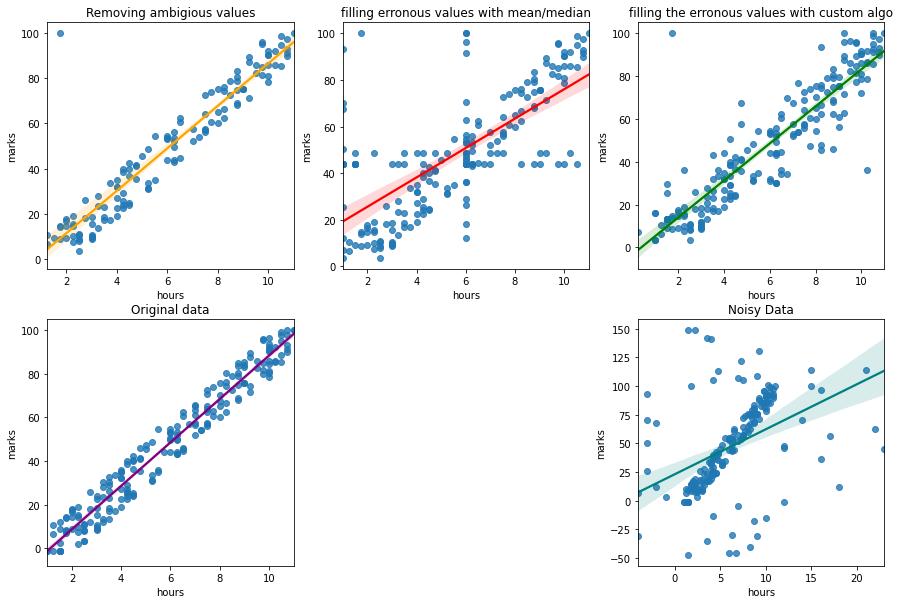

In [44]:
# plot 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(15, 10), ncols=3, nrows=2)

sns.regplot(x='hours', y='marks', data=df2, line_kws={'color': 'orange'}, ax=ax1)
ax1.set(title='Removing ambigious values')

sns.regplot(x='hours', y='marks', data=df3, line_kws={'color':'red'}, ax=ax2)
ax2.set(title='filling erronous values with mean/median')

sns.regplot(x='hours', y='marks', data=df4, line_kws={'color': 'green'}, ax=ax3)
ax3.set(title='filling the erronous values with custom algo')

sns.regplot(x='hours', y='marks', data=original, line_kws={'color': 'purple'}, ax=ax4)
ax4.set(title='Original data')

ax5.axis('off')

sns.regplot(x='hours', y='marks', data=data, line_kws={'color':'teal'}, ax=ax6)
ax6.set(title='Noisy Data');

# Conclusion:
The data follows a more linear pattern. and using just the mean, median and percentile is not enough to generalize the data, and the outliers can confuse the model (in this case linear regression) very much, as seen in the graph of noisy data.

# Thank you